In [283]:
import pandas as pd
import numpy as np
import warnings

In [284]:
warnings.filterwarnings('ignore')

# Reading the Dataset

In [285]:
column_names = ["user_id","item_id","rating","timestamp"]

In [286]:
movie_ratings = pd.read_csv('dataset/u.data',sep="\t",names=column_names)

In [287]:
movie_names = pd.read_csv('dataset/u.item',sep="|",header=None)

# Displaying the data

In [288]:
movie_ratings.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [289]:
movie_names.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Droping the unwanted columns
    From dataFrame 1  we are droping timestamp column 
    From dataFrame 2 we are only dealing with item_id and movie name

In [290]:
movie_ratings = movie_ratings.iloc[:,:-1]

In [291]:
movie_ratings.head()

,user_id,item_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [292]:
movie_names = movie_names.iloc[:,[0,1]]

In [293]:
movie_names.head()

,0,1
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [294]:
column_names = ["item_id","movie_name"]

In [295]:
movie_names.columns = column_names

In [296]:
movie_names.head()

,item_id,movie_name
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


# Merging both the dataFrames

In [297]:
df = pd.merge(movie_ratings,movie_names,on="item_id")

In [298]:
df.head()

,user_id,item_id,rating,movie_name
0,196,242,3,Kolya (1996)
1,63,242,3,Kolya (1996)
2,226,242,5,Kolya (1996)
3,154,242,3,Kolya (1996)
4,306,242,5,Kolya (1996)


# Data Visualization

Visualizing the data with the help of matplot lib and seaborn

In [299]:
import matplotlib.pyplot as plt
import seaborn as sns

In [300]:
sns.set_style('white')

In [307]:
movie_by_rating = pd.DataFrame(df.groupby("movie_name").mean()["rating"].sort_values(ascending=False))

In [308]:
movie_by_rating.head()

,rating
movie_name,
They Made Me a Criminal (1939),5.0
Marlene Dietrich: Shadow and Light (1996),5.0
"Saint of Fort Washington, The (1993)",5.0
Someone Else's America (1995),5.0
Star Kid (1997),5.0


In [309]:
movie_count = pd.DataFrame(df.groupby("movie_name").count()["rating"].sort_values(ascending=False))

In [311]:
movie_count.head()

,rating
movie_name,
Star Wars (1977),583
Contact (1997),509
Fargo (1996),508
Return of the Jedi (1983),507
Liar Liar (1997),485


In [312]:
final_data = pd.merge(movie_rating,movie_count,on="movie_name")

In [313]:
final_data.head()

,rating_x,rating_y
movie_name,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3


In [314]:
final_data.rename(columns={'rating_x': 'rating', 'rating_y': 'count of ratings'}, inplace=True)

In [316]:
final_data.head()

,rating,count of ratings
movie_name,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3


Ploting the histogram of data

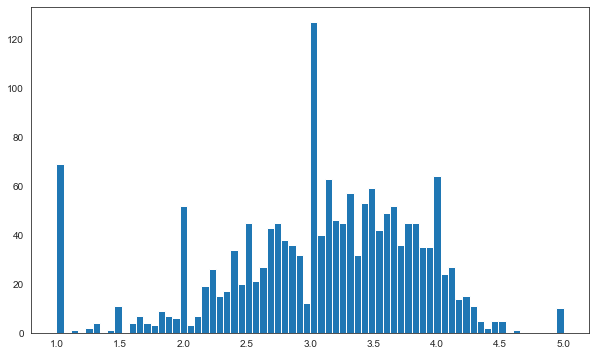

In [321]:
plt.figure(figsize=(10,6))
plt.hist(final_data["rating"],bins=70)
plt.show()

Join plot

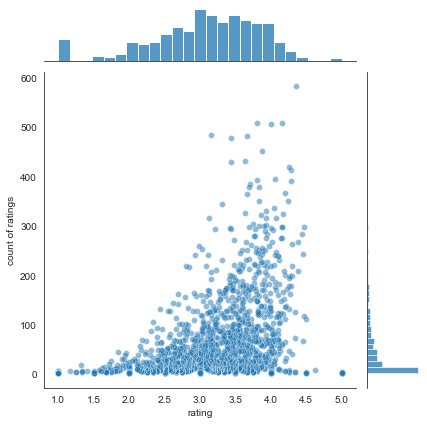

In [324]:
sns.jointplot(x='rating',y='count of ratings',data=final_data,alpha=0.5)

# Creating movie recommendation system
<ul>
    <li>For our recommendation system we will use the basic concept of correlation</li>
</ul>

In [417]:
df.head()

,user_id,item_id,rating,movie_name
0,196,242,3,Kolya (1996)
1,63,242,3,Kolya (1996)
2,226,242,5,Kolya (1996)
3,154,242,3,Kolya (1996)
4,306,242,5,Kolya (1996)


In [418]:
movie_matrix = df.pivot_table(index="user_id",columns="movie_name",values="rating")

In [419]:
movie_matrix.head()

movie_name,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [420]:
movie_name = 'Star Wars (1977)'

In [421]:
movie_details = movie_matrix[movie_name]
print(movie_details)

user_id
1      5.0
2      5.0
3      NaN
4      5.0
5      4.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 943, dtype: float64


In [422]:
recommended_movies = movie_matrix.corrwith(movie_details)
print(recommended_movies)

movie_name
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
� k�ldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64


In [423]:
result = pd.DataFrame(recommended_movies,columns=["correlation"])

In [424]:
result.sort_values("correlation",ascending=False)

,correlation
movie_name,
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
Stripes (1981),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
...,...
Wonderland (1997),NaN
"Wooden Man's Bride, The (Wu Kui) (1994)",NaN
Yankee Zulu (1994),NaN


In [425]:
result.dropna(inplace=True)

In [426]:
result

,correlation
movie_name,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [427]:
final_data.dropna(inplace=True)

In [428]:
final_data.head()

,rating,count of ratings
movie_name,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3


In [429]:
final_result = pd.merge(result,final_data,on="movie_name")

In [430]:
final_result.sort_values("correlation",ascending=False)

,correlation,rating,count of ratings
movie_name,,,
Man of the Year (1995),1.0,3.111111,9
Hollow Reed (1996),1.0,2.333333,6
Stripes (1981),1.0,3.800000,5
"Beans of Egypt, Maine, The (1994)",1.0,3.500000,2
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0,2.600000,5
...,...,...,...
Roseanna's Grave (For Roseanna) (1997),-1.0,2.800000,5
For Ever Mozart (1996),-1.0,2.000000,3
American Dream (1990),-1.0,2.500000,2


In [437]:
final_list = final_result[final_result['count of ratings']>=150].index.tolist()[:5]
print(final_list)

['2001: A Space Odyssey (1968)', 'Abyss, The (1989)', 'African Queen, The (1951)', 'Air Force One (1997)', 'Aladdin (1992)']


# Defining the method to  get recomended  movie list

In [440]:
def recommend_movie(movie_name):
    movie_details = movie_matrix[movie_name]
    recommended_movies = movie_matrix.corrwith(movie_details)
    result = pd.DataFrame(recommended_movies,columns=["correlation"])
    result.sort_values("correlation",ascending=False)
    result.dropna(inplace=True)
    final_result = pd.merge(result,final_data,on="movie_name")
    final_result.sort_values("correlation",ascending=False)
    final_list = final_result[final_result['count of ratings']>=150].index.tolist()[:5]
    return(final_list)

In [441]:
recommend_movie('Star Wars (1977)')

['2001: A Space Odyssey (1968)',
 'Abyss, The (1989)',
 'African Queen, The (1951)',
 'Air Force One (1997)',
 'Aladdin (1992)']